In [24]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# data loading and augmentation
# split the data into training set and validation set
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

train_generator = datagen.flow_from_directory('train/train', target_size=(28, 28), 
                                                    batch_size=32, class_mode='categorical', 
                                                    subset='training', color_mode='grayscale')

valid_generator = datagen.flow_from_directory('train/train', target_size=(28, 28), 
                                                    batch_size=32, class_mode='categorical', 
                                                    subset='validation', color_mode='grayscale' )


Found 45000 images belonging to 10 classes.
Found 15000 images belonging to 10 classes.


In [26]:
train_generator # training data set generator

In [27]:
train_generator.image_shape

(28, 28, 1)

In [28]:
valid_generator.image_shape # validation data set generator

(28, 28, 1)

In [29]:
# define the model
model = tf.keras.models.Sequential()

In [30]:
# add the layers 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))


model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 


In [31]:
# train the model
history = model.fit(x=train_generator, epochs=10, validation_data=valid_generator)

Epoch 1/10
1407/1407 [==============================] - 73s 52ms/step - loss: 0.9497 - accuracy: 0.6428 - val_loss: 0.2088 - val_accuracy: 0.9351
Epoch 2/10
1407/1407 [==============================] - 77s 55ms/step - loss: 0.2496 - accuracy: 0.9138 - val_loss: 0.0981 - val_accuracy: 0.9651
Epoch 3/10
1407/1407 [==============================] - 78s 56ms/step - loss: 0.1337 - accuracy: 0.9553 - val_loss: 0.0555 - val_accuracy: 0.9821
Epoch 4/10
1407/1407 [==============================] - 74s 52ms/step - loss: 0.0933 - accuracy: 0.9690 - val_loss: 0.0406 - val_accuracy: 0.9854
Epoch 5/10
1407/1407 [==============================] - 73s 52ms/step - loss: 0.0689 - accuracy: 0.9778 - val_loss: 0.0469 - val_accuracy: 0.9847
Epoch 6/10
1407/1407 [==============================] - 76s 54ms/step - loss: 0.0512 - accuracy: 0.9833 - val_loss: 0.0440 - val_accuracy: 0.9856
Epoch 7/10
1407/1407 [==============================] - 75s 53ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.0277 -

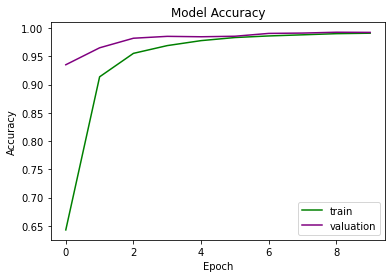

In [32]:
# plot the learning curves
import matplotlib.pyplot as plt
# accuracy plot
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='purple')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valuation'], loc='best')
plt.show()

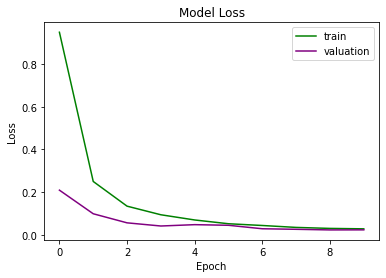

In [33]:
# loss plot
plt.title('Model Loss')
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='purple')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valuation'], loc='best')
plt.show()

In [34]:
eval_result = model.evaluate(valid_generator) # model evalution 

469/469 [==============================] - 7s 16ms/step - loss: 0.0226 - accuracy: 0.9924


In [35]:
# load and prepare the test images to be predicted
from keras.preprocessing import image
import os
import numpy as np
images = []
folder_path = 'test/test'
for filename in os.listdir(folder_path):
    img = image.load_img(os.path.join(folder_path, filename), target_size=(28, 28), color_mode='grayscale')
    img = image.img_to_array(img) # convert the PIL image into an array
    img = img.reshape(1, 28, 28, 1) # reshape the image
    img = img.astype('float') / 255.0 # normalization
    images.append(img)
test_images = np.vstack(images) # convert the list into an array 

In [36]:
test_images.shape # test images shape

(10000, 28, 28, 1)

In [37]:
type(test_images)

numpy.ndarray

In [38]:
# make the predictions
test_probabilities = model.predict(test_images, batch_size=32)
test_indices = np.argmax(test_probabilities, axis=-1)
unique_classes = sorted(os.listdir('train/train')) # get the classes 
test_predictions = [unique_classes[index] for index in test_indices]

In [44]:
type(test_predictions)

list

In [43]:
len(test_predictions)

10000

In [41]:
# write the predictions into a csv file
with open('sample_submission.csv', 'w') as fp:
    fp.write('Id,Category\n')
    for idx in range(10000):
        fp.write(f"{idx:05},{test_predictions[idx]}\n")